In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='352477ed-48d8-4bd5-b305-cb955af2e826', project_access_token='p-c1627613ad47494b9a70eafcdb4d6a7801dcd6c4')
pc = project.project_context


# MARATONA BEHIND THE CODE 2020

## DESAFIO 6 - LIT

<hr>

## Installing Libs

In [2]:
!pip install scikit-learn --upgrade

     |████████████████████████████████| 6.8MB 9.8MB/s eta 0:00:01
     |████████████████████████████████| 307kB 32.9MB/s eta 0:00:01
ERROR: autoai-libs 1.10.5 has requirement numpy>=1.16.4, but you'll have numpy 1.15.4 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement pandas>=0.24.2, but you'll have pandas 0.24.1 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement scikit-learn==0.20.3, but you'll have scikit-learn 0.23.2 which is incompatible.
  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3


In [3]:
!pip install xgboost --upgrade

     |████████████████████████████████| 148.9MB 25.1MB/s eta 0:00:01��██████████████████████████  | 140.0MB 25.1MB/s eta 0:00:01


In [4]:
!pip install imblearn --upgrade

     |████████████████████████████████| 174kB 6.7MB/s eta 0:00:01


<hr>

## Download dos conjuntos de dados em formato .csv

In [5]:
import pandas as pd

In [50]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/training_dataset.csv
df_training_dataset = pd.read_csv(r'training_dataset.csv')
df_training_dataset.tail()

--2020-09-02 23:08:20--  https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/training_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1736600 (1.7M) [text/plain]
Saving to: ‘training_dataset.csv.1’

100%[======================================>] 1,736,600   --.-K/s   in 0.05s   

2020-09-02 23:08:21 (33.5 MB/s) - ‘training_dataset.csv.1’ saved [1736600/1736600]



,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
15852,620397030.0,Bacharelado,UFF,Outros,Borracha,0.0,0.0,1.0,8.0,NaN,10.0,NaN,NaN,NaN,perfil6
15853,229931283.0,Bacharelado,NaN,Advogado,NaN,0.0,0.0,1.0,7.0,Linkedin,42.0,17.0,15.0,NaN,perfil5
15854,480674907.0,Tecnólogo,UNIP,Sócio/Dono/Proprietário,NaN,0.0,NaN,1.0,7.0,Outros,30.0,9.0,8.0,0.0,perfil5
15855,559626807.0,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Advogado,Estado,0.0,0.0,1.0,10.0,NaN,226.0,102.0,93.0,1.0,perfil1
15856,743652801.0,NaN,FGV-RJ,NaN,Siderurgica,1.0,1.0,1.0,9.0,Outros,125.0,98.0,97.0,1.0,perfil1


Sobre o arquivo "training_dataset.csv", temos algumas informações gerais sobre os usuários da plataforma:

**id**

**graduacao**

**universidade**

**profissao**

**organizacao**

**pretende_fazer_cursos_lit**

**interesse_mba_lit**

**importante_ter_certificado**

**horas_semanais_estudo**

**como_conheceu_lit**

**total_modulos**

**modulos_iniciados**

**modulos_finalizados**

**certificados**

**categoria**

In [51]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15857 entries, 0 to 15856
Data columns (total 15 columns):
id                            13945 non-null float64
graduacao                     13950 non-null object
universidade                  13920 non-null object
profissao                     13977 non-null object
organizacao                   13961 non-null object
pretende_fazer_cursos_lit     13989 non-null float64
interesse_mba_lit             14003 non-null float64
importante_ter_certificado    13918 non-null float64
horas_semanais_estudo         13959 non-null float64
como_conheceu_lit             13915 non-null object
total_modulos                 13987 non-null float64
modulos_iniciados             14044 non-null float64
modulos_finalizados           13924 non-null float64
certificados                  13979 non-null float64
categoria                     15857 non-null object
dtypes: float64(9), object(6)
memory usage: 1.8+ MB


In [52]:
df_training_dataset.nunique()

id                            13945
graduacao                         6
universidade                     21
profissao                        12
organizacao                      11
pretende_fazer_cursos_lit         2
interesse_mba_lit                 2
importante_ter_certificado        1
horas_semanais_estudo             9
como_conheceu_lit                 9
total_modulos                   578
modulos_iniciados               372
modulos_finalizados             339
certificados                     23
categoria                         6
dtype: int64

<hr>

## Detalhamento do desafio: classificação multiclasse

Este é um desafio cujo objetivo de negócio é a segmentação dos usuários de uma plataforma de ensino. Para tal, podemos utilizar duas abordagens: aprendizado de máquina supervisionado (classificação) ou não-supervisionado (clustering). Neste desafio será aplicada a classificação, pois é disponível um dataset já com "labels", ou em outras palavras, já com exemplos de dados juntamente com a variável alvo.

Na biblioteca scikit-learn temos diversos algoritmos para classificação. O participante é livre para utilizar o framework que desejar para completar esse desafio.

Neste notebook será mostrado um exeplo de uso do algoritmo "Decision Tree" para classificar parte dos estudantes em seis diferentes perfís.

# Atenção!

A coluna-alvo neste desafio é a coluna ``categoria``

<hr>

## Pre-processando o dataset antes do treinamento

### Removendo todas as linhas que possuem algum valor nulos em determinadas colunas

Usando o método Pandas **DataFrame.dropna()** você pode remover todas as linhas nulas do dataset.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [55]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação DropNA: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset antes da transformação DropNA: 

id                            1482
graduacao                     1488
universidade                  1486
profissao                     1454
organizacao                   1482
pretende_fazer_cursos_lit     1484
interesse_mba_lit             1448
importante_ter_certificado    1499
horas_semanais_estudo         1472
como_conheceu_lit             1485
total_modulos                    0
modulos_iniciados             1417
modulos_finalizados           1476
certificados                     0
categoria                        0
dtype: int64



In [56]:
# Aplicando a função para deletar todas as linhas com valor NaN na coluna ``certificados'' e ``total_modulos'':
df_training_dataset = df_training_dataset.dropna(axis='index', how='any', subset=['certificados', 'total_modulos'])

In [57]:
# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação DropNA: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset após a transformação DropNA: 

id                            1482
graduacao                     1488
universidade                  1486
profissao                     1454
organizacao                   1482
pretende_fazer_cursos_lit     1484
interesse_mba_lit             1448
importante_ter_certificado    1499
horas_semanais_estudo         1472
como_conheceu_lit             1485
total_modulos                    0
modulos_iniciados             1417
modulos_finalizados           1476
certificados                     0
categoria                        0
dtype: int64



### Processando valores NaN com o SimpleImputer do sklearn

Para os valores NaN, usaremos a substituição pela constante 0 como **exemplo**.

Você pode escolher a estratégia que achar melhor para tratar os valores nulos :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [58]:
from sklearn.impute import SimpleImputer
import numpy as np


impute_zeros = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value=0,
    verbose=0,
    copy=True
)

In [59]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação SimpleImputer: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

# Aplicando a transformação ``SimpleImputer`` no conjunto de dados base
impute_zeros.fit(X=df_training_dataset)

# Reconstruindo um Pandas DataFrame com os resultados
df_training_dataset_imputed = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_training_dataset
    ),
    columns=df_training_dataset.columns
)

# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação SimpleImputer: \n\n{}\n".format(df_training_dataset_imputed.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset antes da transformação SimpleImputer: 

id                            1482
graduacao                     1488
universidade                  1486
profissao                     1454
organizacao                   1482
pretende_fazer_cursos_lit     1484
interesse_mba_lit             1448
importante_ter_certificado    1499
horas_semanais_estudo         1472
como_conheceu_lit             1485
total_modulos                    0
modulos_iniciados             1417
modulos_finalizados           1476
certificados                     0
categoria                        0
dtype: int64

Valores nulos no df_training_dataset após a transformação SimpleImputer: 

id                            0
graduacao                     0
universidade                  0
profissao                     0
organizacao                   0
pretende_fazer_cursos_lit     0
interesse_mba_lit             0
importante_ter_certificado    0
horas_semanais_estudo         0
como_conheceu_lit    

### Eliminando colunas indesejadas

Vamos **demonstrar** abaixo como usar o método **DataFrame.drop()**.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [60]:
df_training_dataset_imputed.tail()

,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
12324,722542433.0,Bacharelado,0,Engenheiro,servicos,1.0,1.0,1.0,6.0,Outros,515.0,166.0,102.0,0.0,perfil4
12325,931753956.0,SEM FORMAÇÃO,UFRN,Supervisor,Siderurgica,0.0,0.0,1.0,8.0,Instagram,54.0,37.0,31.0,0.0,perfil2
12326,480674907.0,Tecnólogo,UNIP,Sócio/Dono/Proprietário,0,0.0,0.0,1.0,7.0,Outros,30.0,9.0,8.0,0.0,perfil5
12327,559626807.0,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Advogado,Estado,0.0,0.0,1.0,10.0,0,226.0,102.0,93.0,1.0,perfil1
12328,743652801.0,0,FGV-RJ,0,Siderurgica,1.0,1.0,1.0,9.0,Outros,125.0,98.0,97.0,1.0,perfil1


In [61]:
df_training_dataset_rmcolumns = df_training_dataset_imputed.drop(columns=['id', 'graduacao', 'universidade', 'organizacao', 'como_conheceu_lit'], inplace=False)

In [62]:
df_training_dataset_rmcolumns.tail()

,profissao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
12324,Engenheiro,1.0,1.0,1.0,6.0,515.0,166.0,102.0,0.0,perfil4
12325,Supervisor,0.0,0.0,1.0,8.0,54.0,37.0,31.0,0.0,perfil2
12326,Sócio/Dono/Proprietário,0.0,0.0,1.0,7.0,30.0,9.0,8.0,0.0,perfil5
12327,Advogado,0.0,0.0,1.0,10.0,226.0,102.0,93.0,1.0,perfil1
12328,0,1.0,1.0,1.0,9.0,125.0,98.0,97.0,1.0,perfil1


# Atenção!

As colunas removidas acima são apenas para fim de exemplo, você pode usar as colunas que quiser e inclusive criar novas colunas com dados que achar importantes!


### Tratamento de de variáveis categóricas

Como mencionado antes, os computadores não são bons com variáveis "categóricas" (ou strings).

Dado uma coluna com variável categórica, o que podemos realizar é a codificação dessa coluna em múltiplas colunas contendo variáveis binárias. Esse processo é chamado de "one-hot-encoding" ou "dummy encoding". Se você não é familiarizado com esses termos, você pode pesquisar mais sobre isso na internet :)

In [63]:
# Tratando variáveis categóricas com o método Pandas ``get_dummies()''
df_training = pd.get_dummies(df_training_dataset_rmcolumns, columns=['profissao'])
df_training.tail()

,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria,profissao_0,...,profissao_Analista Senior,profissao_Assessor,profissao_Coordenador,profissao_Diretor,profissao_Engenheiro,profissao_Gerente,profissao_Outros,profissao_SEM EXPERIÊNCIA,profissao_Supervisor,profissao_Sócio/Dono/Proprietário
12324,1.0,1.0,1.0,6.0,515.0,166.0,102.0,0.0,perfil4,0,...,0,0,0,0,1,0,0,0,0,0
12325,0.0,0.0,1.0,8.0,54.0,37.0,31.0,0.0,perfil2,0,...,0,0,0,0,0,0,0,0,1,0
12326,0.0,0.0,1.0,7.0,30.0,9.0,8.0,0.0,perfil5,0,...,0,0,0,0,0,0,0,0,0,1
12327,0.0,0.0,1.0,10.0,226.0,102.0,93.0,1.0,perfil1,0,...,0,0,0,0,0,0,0,0,0,0
12328,1.0,1.0,1.0,9.0,125.0,98.0,97.0,1.0,perfil1,1,...,0,0,0,0,0,0,0,0,0,0


# Atenção!

A coluna **categoria** deve ser mantida como uma string. Você não precisa processar/codificar a variável-alvo.

<hr>

## Treinando um classificador com base em uma árvore de decisão

### Selecionando FEATURES e definindo a variável TARGET

In [64]:
df_training.columns

Index(['pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'importante_ter_certificado', 'horas_semanais_estudo', 'total_modulos',
       'modulos_iniciados', 'modulos_finalizados', 'certificados', 'categoria',
       'profissao_0', 'profissao_Advogado', 'profissao_Analista',
       'profissao_Analista Senior', 'profissao_Assessor',
       'profissao_Coordenador', 'profissao_Diretor', 'profissao_Engenheiro',
       'profissao_Gerente', 'profissao_Outros', 'profissao_SEM EXPERIÊNCIA',
       'profissao_Supervisor', 'profissao_Sócio/Dono/Proprietário'],
      dtype='object')

In [65]:
features = df_training[
    [
        'pretende_fazer_cursos_lit', 'interesse_mba_lit',
        'importante_ter_certificado', 'horas_semanais_estudo', 'total_modulos',
        'modulos_iniciados', 'modulos_finalizados', 'certificados',
        'profissao_0', 'profissao_Advogado', 'profissao_Analista',
        'profissao_Analista Senior', 'profissao_Assessor',
        'profissao_Coordenador', 'profissao_Diretor', 'profissao_Engenheiro',
        'profissao_Gerente', 'profissao_Outros', 'profissao_SEM EXPERIÊNCIA',
        'profissao_Supervisor', 'profissao_Sócio/Dono/Proprietário'
    ]
]
target = df_training['categoria']  ## NÃO TROQUE O NOME DA VARIÁVEL TARGET.

### Dividindo nosso conjunto de dados em conjuntos de treinamento e teste

In [66]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=133)

### Treinando uma árvore de decisão

In [67]:

from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
dtc = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
dtc.fit(X_train, y_train)


RandomForestClassifier(max_features='sqrt')

### Fazendo previsões na amostra de teste

In [70]:
y_pred = dtc.predict(X_test)
print(y_pred)

['perfil5' 'perfil6' 'perfil2' ... 'perfil2' 'perfil3' 'perfil5']


### Analisando a qualidade do modelo através da matriz de confusão

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

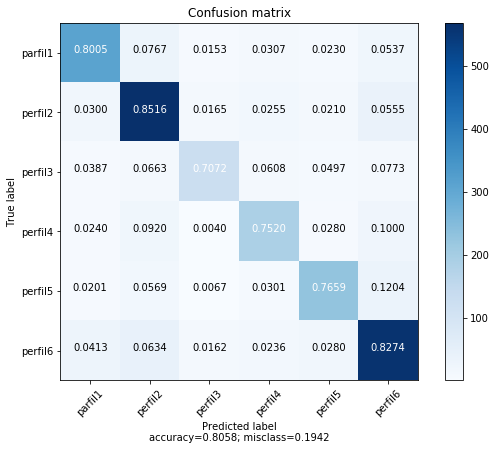

In [49]:
from sklearn.metrics import confusion_matrix


plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['parfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5', 'perfil6'])

<hr>

## Scoring dos dados necessários para entregar a solução

Como entrega da sua solução, esperamos os resultados classificados no seguinte dataset chamado "to_be_scored.csv":

### Download da "folha de respostas"

In [72]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'to_be_scored.csv')
df_to_be_scored.tail()

--2020-09-02 23:13:19--  https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/to_be_scored.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96291 (94K) [text/plain]
Saving to: ‘to_be_scored.csv’

100%[======================================>] 96,291      --.-K/s   in 0.006s  

2020-09-02 23:13:19 (14.9 MB/s) - ‘to_be_scored.csv’ saved [96291/96291]



,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados
995,741745189,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Coordenador,Borracha,0,0,1,2,YouTube,245,63,45,1
996,996387882,Bacharelado,UFRN,Assessor,Estado,1,1,1,8,Google,163,111,96,0
997,668869418,Bacharelado,UFSCar,Gerente,Siderurgica,1,1,1,9,Facebook,56,10,4,0
998,676531718,Tecnólogo,FATEC,Outros,servicos,1,1,1,9,Mídia (revista/jornal/web),138,60,30,0
999,388402340,Especialização,UNIP,Advogado,Montadora,0,0,1,9,Mídia (revista/jornal/web),22,20,19,0


# Atenção!

O dataframe ``to_be_scored`` é a sua "folha de respostas". Note que a coluna "categoria" não existe nessa amostra, que não pode ser então utilizada para treino de modelos de aprendizado supervisionado.

In [73]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
id                            1000 non-null int64
graduacao                     1000 non-null object
universidade                  1000 non-null object
profissao                     1000 non-null object
organizacao                   1000 non-null object
pretende_fazer_cursos_lit     1000 non-null int64
interesse_mba_lit             1000 non-null int64
importante_ter_certificado    1000 non-null int64
horas_semanais_estudo         1000 non-null int64
como_conheceu_lit             1000 non-null object
total_modulos                 1000 non-null int64
modulos_iniciados             1000 non-null int64
modulos_finalizados           1000 non-null int64
certificados                  1000 non-null int64
dtypes: int64(9), object(5)
memory usage: 109.5+ KB


<hr>

# Atenção!

# Para poder aplicar seu modelo e classificar a folha de respostas, você precisa primeiro aplicar as mesmas transformações com colunas que você aplicou no dataset de treino.

# Não remova ou adicione linhas na folha de respostas. 

# Não altere a ordem das linhas na folha de respostas.

# Ao final, as 1000 entradas devem estar classificadas, com os valores previstos em uma coluna chamada "target"

<hr>

Na célula abaixo, repetimos rapidamente os mesmos passos de pré-processamento usados no exemplo dado com árvore de decisão

In [74]:
# 1 - Removendo linhas com valores NaN em "certificados" e "total_modulos"
df_to_be_scored_1 = df_to_be_scored.dropna(axis='index', how='any', subset=['certificados', 'total_modulos'])

# 2 - Inputando zeros nos valores faltantes
impute_zeros.fit(X=df_to_be_scored_1)
df_to_be_scored_2 = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_to_be_scored_1
    ),
    columns=df_to_be_scored_1.columns
)

# 3 - Remoção de colunas
df_to_be_scored_3 = df_to_be_scored_2.drop(columns=['id', 'graduacao', 'universidade', 'organizacao', 'como_conheceu_lit'], inplace=False)

# 4 - Encoding com "dummy variables"
df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_3, columns=['profissao'])

df_to_be_scored_4.tail()

,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,total_modulos,modulos_iniciados,modulos_finalizados,certificados,profissao_Advogado,profissao_Analista,profissao_Analista Senior,profissao_Assessor,profissao_Coordenador,profissao_Diretor,profissao_Engenheiro,profissao_Gerente,profissao_Outros,profissao_SEM EXPERIÊNCIA,profissao_Supervisor,profissao_Sócio/Dono/Proprietário
995,0,0,1,2,245,63,45,1,0,0,0,0,1,0,0,0,0,0,0,0
996,1,1,1,8,163,111,96,0,0,0,0,1,0,0,0,0,0,0,0,0
997,1,1,1,9,56,10,4,0,0,0,0,0,0,0,0,1,0,0,0,0
998,1,1,1,9,138,60,30,0,0,0,0,0,0,0,0,0,1,0,0,0
999,0,0,1,9,22,20,19,0,1,0,0,0,0,0,0,0,0,0,0,0


<hr>

Pode ser verificado abaixo que as colunas da folha de resposta agora são idênticas às que foram usadas para treinar o modelo:

In [75]:
df_training[
    [
        'pretende_fazer_cursos_lit', 'interesse_mba_lit',
        'importante_ter_certificado', 'horas_semanais_estudo', 'total_modulos',
        'modulos_iniciados', 'modulos_finalizados', 'certificados',
        'profissao_0', 'profissao_Advogado', 'profissao_Analista',
        'profissao_Analista Senior', 'profissao_Assessor',
        'profissao_Coordenador', 'profissao_Diretor', 'profissao_Engenheiro',
        'profissao_Gerente', 'profissao_Outros', 'profissao_SEM EXPERIÊNCIA',
        'profissao_Supervisor', 'profissao_Sócio/Dono/Proprietário'
    ]
].columns

Index(['pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'importante_ter_certificado', 'horas_semanais_estudo', 'total_modulos',
       'modulos_iniciados', 'modulos_finalizados', 'certificados',
       'profissao_0', 'profissao_Advogado', 'profissao_Analista',
       'profissao_Analista Senior', 'profissao_Assessor',
       'profissao_Coordenador', 'profissao_Diretor', 'profissao_Engenheiro',
       'profissao_Gerente', 'profissao_Outros', 'profissao_SEM EXPERIÊNCIA',
       'profissao_Supervisor', 'profissao_Sócio/Dono/Proprietário'],
      dtype='object')

In [76]:
df_to_be_scored_4.columns

Index(['pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'importante_ter_certificado', 'horas_semanais_estudo', 'total_modulos',
       'modulos_iniciados', 'modulos_finalizados', 'certificados',
       'profissao_Advogado', 'profissao_Analista', 'profissao_Analista Senior',
       'profissao_Assessor', 'profissao_Coordenador', 'profissao_Diretor',
       'profissao_Engenheiro', 'profissao_Gerente', 'profissao_Outros',
       'profissao_SEM EXPERIÊNCIA', 'profissao_Supervisor',
       'profissao_Sócio/Dono/Proprietário'],
      dtype='object')

# Atenção

Para todas colunas que não existirem no "df_to_be_scored", você pode usar a técnica abaixo para adicioná-las:

In [ ]:
df_to_be_scored_4['profissao_0'] = 0

In [ ]:
y_pred = dtc.predict(df_to_be_scored_4)
df_to_be_scored_4['target'] = y_pred
df_to_be_scored_4.tail()

### Salvando a folha de respostas como um arquivo .csv para ser submetido

In [ ]:
project.save_data(file_name="results.csv", data=df_to_be_scored_4.to_csv(index=False))

# Atenção

# A execução da célula acima irá criar um novo "data asset" no seu projeto no Watson Studio. Você precisará realizar o download deste arquivo juntamente com este notebook e criar um arquivo zip com os arquivos **results.csv** e **notebook.ipynb** para submissão. (os arquivos devem estar nomeados desta forma)

<hr>

## Parabéns!

Se você já está satisfeito com a sua solução, vá até a página abaixo e envie os arquivos necessários para submissão.

# https://lit.maratona.dev
